In [1]:
# Importing the necessary packages

import numpy as np
import os, sys
import matplotlib.pyplot as plt

# importing XSPEC

import xspec as xs
xs.Xset.allowPrompting = False #keeps pyxspec from hanging, waiting a response to a prompt
xs.Xset.allowNewAttributes = True

In [2]:
N = np.logspace(np.log10(8.4e-8), np.log10(8.4e2), 30) # normalization values, [1e-52 cm^-2]
E_LLE = np.load('bn121225417_EMeV.npy') # LLE energy bins, [MeV]
SED10 = np.load('bn121225417_SED10.npy') # the output of Manuel's code, N = 1 cm^-2

from scipy.interpolate import interp1d
f = interp1d(E_LLE*1000, SED10/1000, 'cubic', fill_value="extrapolate") # in keV and per keV


# defining Xspec model

def ALP(engs, params, flux):
    energy_binsizes = np.ediff1d(engs)
    # finding the average bin value for energy
    energy = (np.asarray(engs[:-1])+np.asarray(engs[1:]))/2
    flux[:] = f(energy) * energy_binsizes

ALPInfo = ()
xs.AllModels.addPyMod(ALP, ALPInfo, 'add', spectrumDependent=False)

In [3]:
xerr_uf = np.empty((30, 2001, len(E_LLE)))
yerr_uf = np.empty((30, 2001, len(E_LLE)))
spec_uf = np.empty((30, 2001, len(E_LLE)))
bkg_uf = np.empty((30, 2001, len(E_LLE)))


xs.AllData.clear()

for j in range(30):
    xs.AllData.clear()
    for i in range(1,2001):
        xs.AllData += "bn121225417_fakeit_%s.fak{%s}" %(j,i)    
    xs.response = "bn121225417_LAT-LLE_weightedrsp.rsp"
    xs.background= ("bn121225417_LAT-LLE_bkgspectra.bak{1}")
    xs.AllModels.clear() 
    m = xs.Model('ALP')
    m.ALP.norm.values = N[j]
    m.ALP.norm.frozen = True
    xs.Plot.device="/xs"
    xs.Plot.xAxis="MeV"
    xs.Plot.add=True
    xs.Plot.background=False
    xs.Plot.xLog=True
    xs.Plot.yLog=True
    xs.Plot.show()
    xs.Plot("ufspec") # this is the unfolded spectrum
    xerr_uf[j, i,:] = np.asarray(xs.Plot.xErr(i))
    yerr_uf[j, i,:] = np.asarray(xs.Plot.yErr(i))
    spec_uf[j, i,:] = np.asarray(xs.Plot.y(i))


User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:

User entered plot commands:


In [5]:
np.save('xerr_uf.npy', xerr_uf)
np.save('yerr_uf.npy', yerr_uf)
np.save('spec_uf.npy', spec_uf)

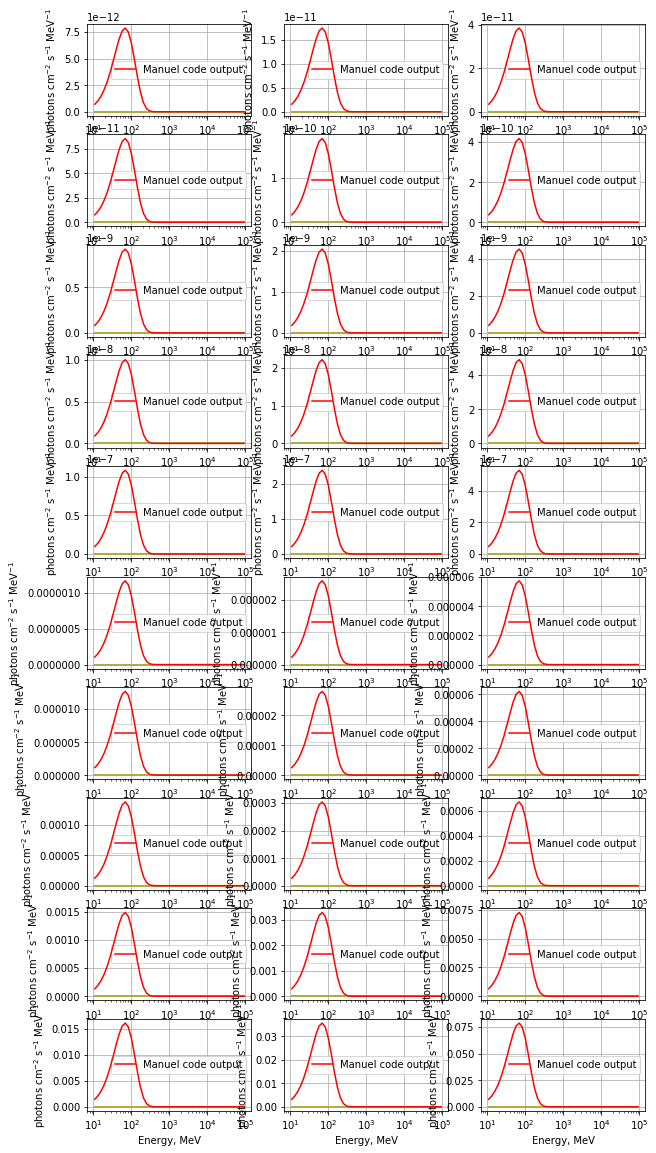

In [9]:
fig, axs = plt.subplots(10,3,figsize=(10,20))

for j in range(30):
    plt.subplot(10,3,j+1)
    for i in range(1,10):
        plt.errorbar(E_LLE, spec_uf[j,i,:], xerr=xerr_uf[j,i,:], yerr=yerr_uf[j,i,:])
    
    plt.plot(E_LLE, SED10*N[j],'r', zorder = 2001, label='Manuel code output')
    plt.xlabel('Energy, MeV')
    plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ')
    plt.xscale('log')
#     plt.yscale('log')
#     plt.ylim(1e-6, 1e-2)
    plt.grid()
    plt.legend()

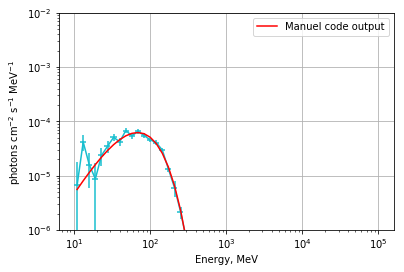

In [8]:
for i in range(1,2001):
    plt.errorbar(E_LLE, spec_uf[20,i,:], xerr=xerr_uf[20,i,:], yerr=yerr_uf[20,i,:])

plt.plot(E_LLE, SED10*N[20],'r', zorder = 2001, label='Manuel code output')
plt.xlabel('Energy, MeV')
plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-6, 1e-2)
plt.grid()
plt.legend()

In [4]:
# for i in range(1,2001):
#     plt.errorbar(E_LLE, spec_uf[i,:], xerr=xerr_uf[i,:], yerr=yerr_uf[i,:])

# plt.plot(E_LLE, SED10*N[0],'r', zorder = 2001, label='Manuel code output')
# plt.xlabel('Energy, MeV')
# plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ')
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(1e-6, 1e-2)
# plt.grid()
# plt.legend()